#  Problem Statement: To find the factors affecting Cost of Medical Treatments 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Read the CSV file
df = pd.read_csv("C://Users//vaishnavi//OneDrive_Backup//Desktop//Data Science EduTech//Projects//Datasets//Medical cost//medical_cost.csv")

# Display the first few rows of the DataFrame to ensure it was read correctly
print(df.head(20))




In [4]:
df.shape

(1338, 8)

In [4]:
df.columns #to get the names of the columns and classify them to categorical or numerical type


Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


# data preprocessing:

In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:

# Label encoding for 'sex' column
df['sex_encoded'] = np.where(df['sex'] == 'male', 1, 0)  # Male: 1, Female: 0

# Separate males and females
males = df[df['sex_encoded'] == 1]
females = df[df['sex_encoded'] == 0]

# Display the first few rows of males and females
print("Males:")
print(males.head())

print("\nFemales:")
print(females.head())

# Label encoding for 'smoker' column
df['smoker_encoded'] = np.where(df['smoker'] == 'yes', 1, 0)  # Smoker: 1, Non-smoker: 0

# Separate smokers and non-smokers
smokers = df[df['smoker_encoded'] == 1]
non_smokers = df[df['smoker_encoded'] == 0]

# Display the first few rows of smokers and non-smokers
print("\nSmokers:")
print(smokers.head())

print("\nNon-Smokers:")
print(non_smokers.head())

Males:
   Id  age   sex     bmi  children smoker     region      charges  sex_encoded
1   2   18  male  33.770         1     no  southeast   1725.55230            1
2   3   28  male  33.000         3     no  southeast   4449.46200            1
3   4   33  male  22.705         0     no  northwest  21984.47061            1
4   5   32  male  28.880         0     no  northwest   3866.85520            1
8   9   37  male  29.830         2     no  northeast   6406.41070            1

Females:
   Id  age     sex    bmi  children smoker     region      charges  \
0   1   19  female  27.90         0    yes  southwest  16884.92400   
5   6   31  female  25.74         0     no  southeast   3756.62160   
6   7   46  female  33.44         1     no  southeast   8240.58960   
7   8   37  female  27.74         3     no  northwest   7281.50560   
9  10   60  female  25.84         0     no  northwest  28923.13692   

   sex_encoded  
0            0  
5            0  
6            0  
7            0  
9  

In [9]:
df.columns
df.describe()

,Id,age,bmi,children,charges,sex_encoded,smoker_encoded
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783
std,386.391641,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,1.000000,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,335.250000,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000
50%,669.500000,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000
max,1338.000000,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


The total number of men and women in the dataset are: 1    676
0    662
Name: sex_encoded, dtype: int64


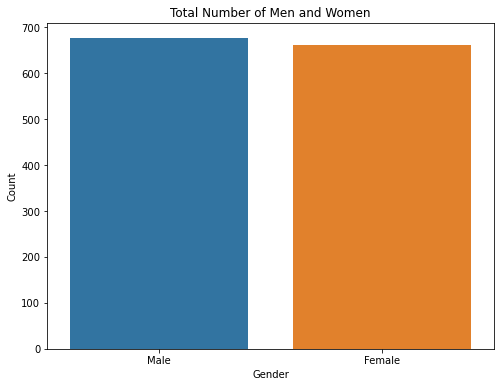

In [21]:
#the total number of men and women in the dataset
total = df['sex_encoded'].value_counts()
print("The total number of men and women in the dataset are:",total)

# Count the number of men and women
gender_counts = df['sex_encoded'].value_counts()

# Map encoded values to gender labels
gender_labels = {1: 'Male', 0: 'Female'}
gender_counts.index = gender_counts.index.map(gender_labels)

# Plot the total number of men and women
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Total Number of Men and Women')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [11]:
df.columns

Index(['Id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_encoded', 'smoker_encoded'],
      dtype='object')

The region-wise people are: southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


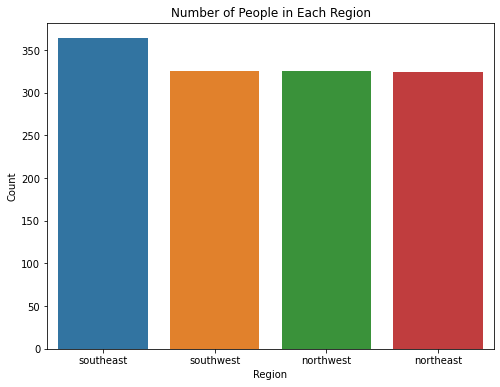

In [20]:
# Count the number of people in each region
region_counts = df['region'].value_counts()
print("The region-wise people are:",region_counts)
# Plot the counts for each region
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of People in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

<Figure size 720x432 with 0 Axes>

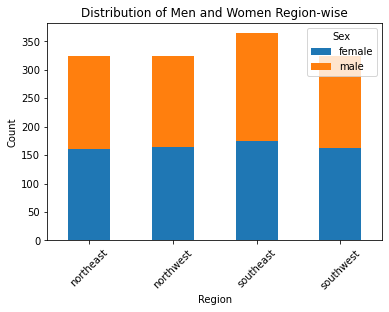

In [91]:
# Group the data by region and sex, and count the number of occurrences
region_sex_counts = df.groupby(['region', 'sex']).size().unstack()

# Plot the distribution of men and women region-wise using a stacked bar plot
plt.figure(figsize=(10, 6))
region_sex_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Men and Women Region-wise')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper right')
plt.show()

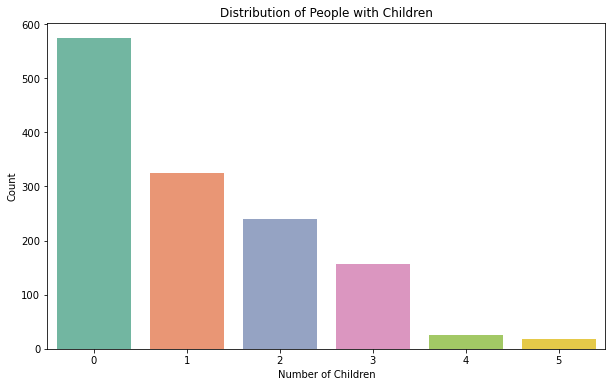

In [100]:

#the distibution of people who have children
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='children', palette='Set2')
plt.title('Distribution of People with Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

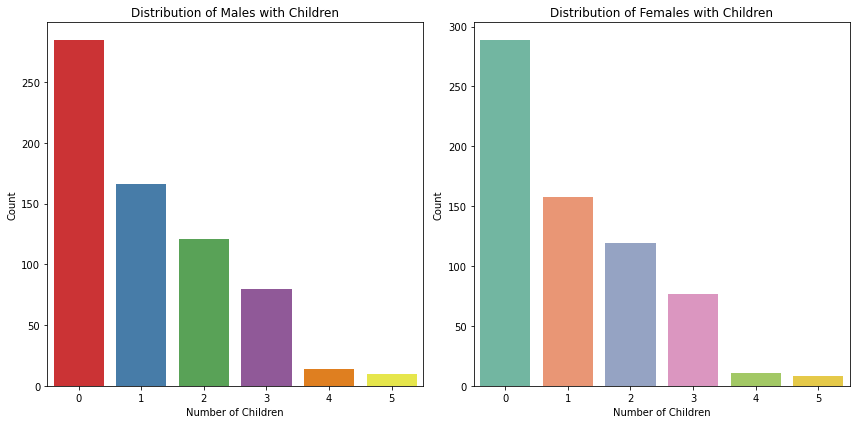

In [101]:
# Plot the distribution of people who have children gender-wise
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df[df['sex'] == 'male'], x='children', palette='Set1')
plt.title('Distribution of Males with Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df[df['sex'] == 'female'], x='children', palette='Set2')
plt.title('Distribution of Females with Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

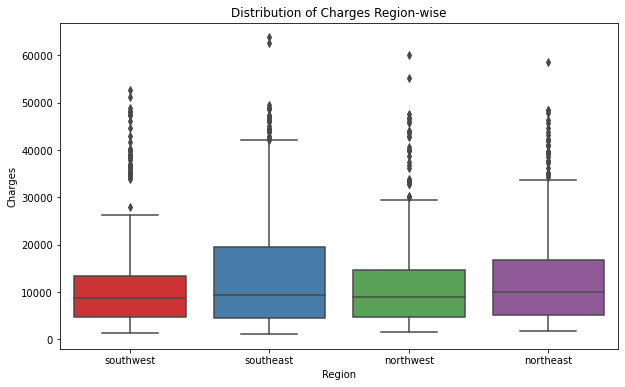

In [103]:

#the distribution of charges regionwise
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', palette='Set1')
plt.title('Distribution of Charges Region-wise')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

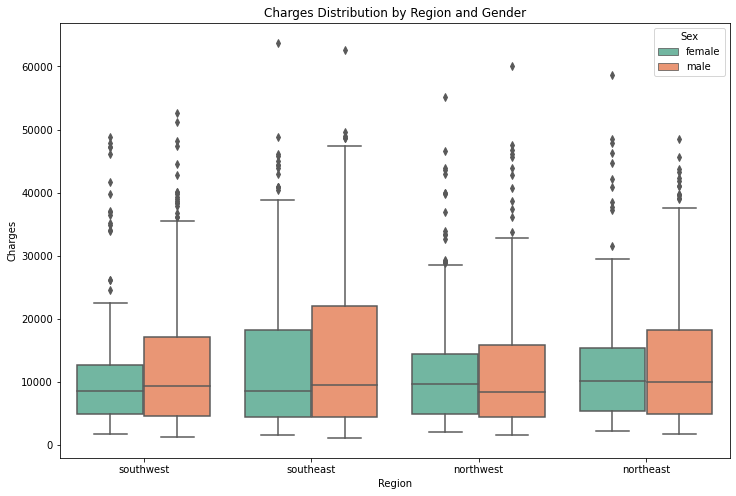

In [111]:
# Plot the distribution of charges based on regions and genders
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='region', y='charges', hue='sex', palette='Set2')
plt.title('Charges Distribution by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.legend(title='Sex', loc='upper right')
plt.show()

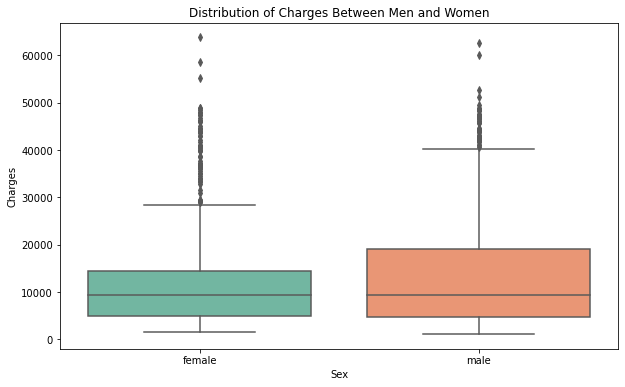

In [105]:
#the distribution of charges between men and women
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='charges', palette='Set2')
plt.title('Distribution of Charges Between Men and Women')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

The total number of smokers and non-smokers: 0    1064
1     274
Name: smoker_encoded, dtype: int64


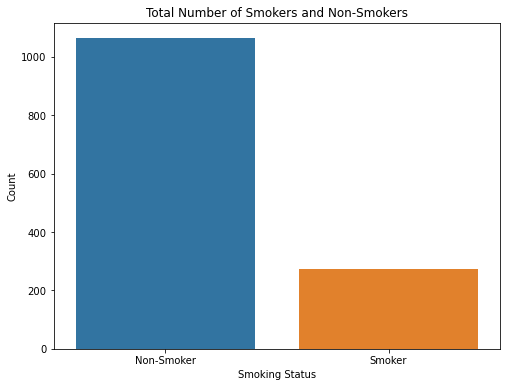

In [22]:
#the total distribution of population who are smokers

# Count the number of smokers and non-smokers
smoker_counts = df['smoker_encoded'].value_counts()
print("The total number of smokers and non-smokers:", smoker_counts)
# Map encoded values to smoker labels
smoker_labels = {1: 'Smoker', 0: 'Non-Smoker'}
smoker_counts.index = smoker_counts.index.map(smoker_labels)

# Plot the total number of smokers and non-smokers
plt.figure(figsize=(8, 6))
sns.barplot(x=smoker_counts.index, y=smoker_counts.values)
plt.title('Total Number of Smokers and Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

The male smokers region
northeast    38
northwest    29
southeast    55
southwest    37
dtype: int64


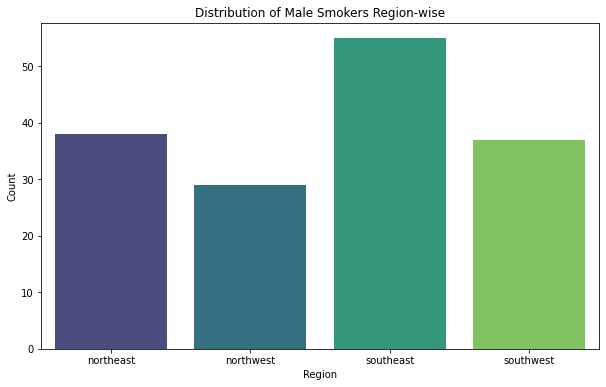

In [24]:
#the distribution of men smokers

# Filter the dataframe for male smokers
male_smokers = df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]

# Group the data by region and count the number of male smokers in each region
region_counts = male_smokers.groupby('region').size()

print("The male smokers",region_counts)
# Plot the distribution of male smokers region-wise
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Distribution of Male Smokers Region-wise')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

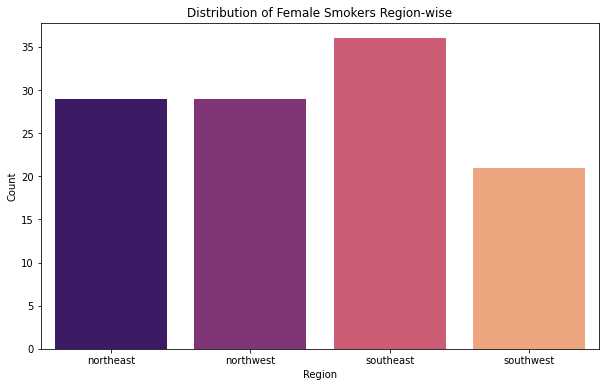

In [99]:
#the distribution of women smokers
# Filter the dataframe for female smokers
female_smokers = df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]

# Group the data by region and count the number of female smokers in each region
region_counts = female_smokers.groupby('region').size()

# Plot the distribution of female smokers region-wise
plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='magma')
plt.title('Distribution of Female Smokers Region-wise')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

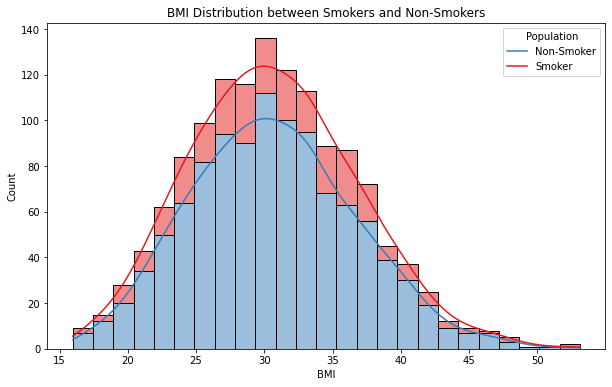

In [110]:
# Plot the BMI distribution between smokers and non-smokers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='smoker', multiple='stack', kde=True, palette='Set1')
plt.title('BMI Distribution between Smokers and Non-Smokers')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='Population', labels=['Non-Smoker', 'Smoker'])
plt.show()

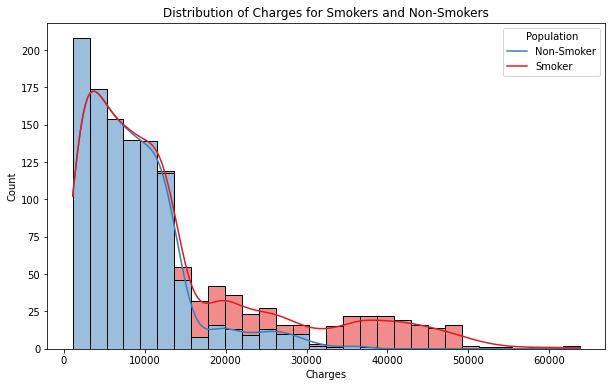

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='charges', hue='smoker', multiple='stack', kde=True, palette='Set1')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.legend(title='Population', labels=['Non-Smoker', 'Smoker'])
plt.show()

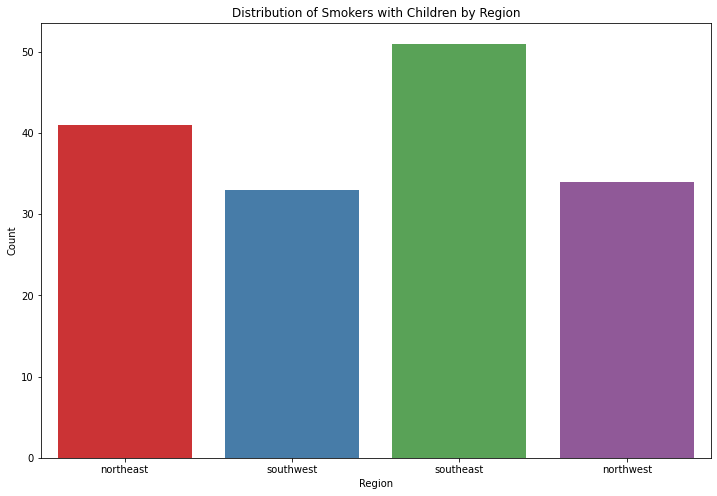

In [114]:
# Filter the DataFrame for smokers with children
smokers_with_children = df[(df['smoker'] == 'yes') & (df['children'] > 0)]

# Plot the count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=smokers_with_children, x='region', palette='Set1')
plt.title('Distribution of Smokers with Children by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()